# Plot training curves of different experiments

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
#from meld_graph.paths import EXPERIMENT_PATH
import os
from meld_graph.experiment import Experiment, discover_trained_experiments
import numpy as np

Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1
Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 


In [6]:
# get list of trained experiments
EXPERIMENT_PATH = '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1'
exps_compare={
    'histo':'23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols',            
}

#compare only one fold 
folds = [0]

experiment_paths=[]
exp_names = []
exp_folds = []
for pi,path in enumerate(exps_compare.keys()):
    for fold in folds:
        experiment_paths.append(os.path.join(EXPERIMENT_PATH, exps_compare[path],f'fold_0{fold}'))
        exp_names.append(path)
        exp_folds.append(fold)

In [7]:
experiment_paths

['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00']

In [8]:
exps = [Experiment.from_folder(os.path.join(EXPERIMENT_PATH,p)) for p in experiment_paths]
experiment_paths

Initialised Experiment 23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols


['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00']

In [6]:
## plot segmentation loss

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,3))
for exp, exp_name in zip(exps,exp_names):
    scores = exp.get_scores(split='train')['dice'] + exp.get_scores(split='train')['cross_entropy']
    ax1.plot(scores.index, scores, label=exp_name)
    scores = exp.get_scores(split='val')['dice'] + exp.get_scores(split='val')['cross_entropy']
    ax2.plot(scores.index, scores, label=exp_name)
ax1.set_xlabel('epochs', fontsize=12)
ax1.set_ylabel('cross entropy + dice loss', fontsize=12)
ax1.set_title(f'Segmentation loss on training', fontsize=15)
# ax1.set_xlim([0,600])
ax1.legend(loc='upper right')
ax2.set_xlabel('epochs', fontsize=12)
ax2.set_ylabel('cross entropy + dice loss', fontsize=12)
ax2.set_title(f'Segmentation loss on validation', fontsize=15)
# ax2.set_xlim([0,600])

plt.tight_layout()

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00


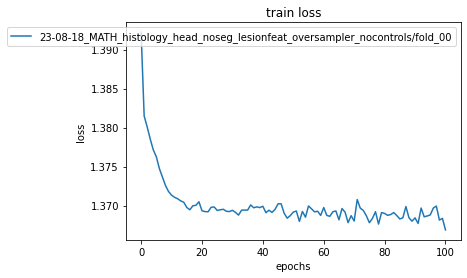

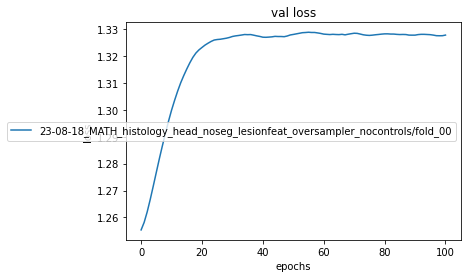

In [9]:
# plot total loss
def plot_scores(exps, score='loss', split='val'):
    scores = []
    fig, ax = plt.subplots(1,1)
    stored_scores=[]
    for exp in exps:
        scores = exp.get_scores(split=split)[score]
        ax.plot(scores.index, scores, label=os.path.join(exp.experiment_name, f'fold_{exp.fold:02d}'))
        stored_scores.append(scores)
    ax.set_xlabel('epochs')
    ax.set_ylabel(score)
    ax.set_title(f'{split} {score}')
    plt.legend()
    return stored_scores

dice_l=plot_scores(exps, 'loss',split='train')
dice_l=plot_scores(exps, 'loss',split='val')


/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-18_MATH_histology_head_noseg_lesionfeat_oversampler_nocontrols/fold_00
/rds/project/kw350/rds-kw350-meld/

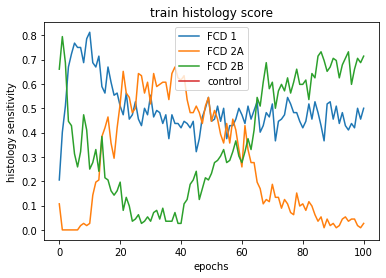

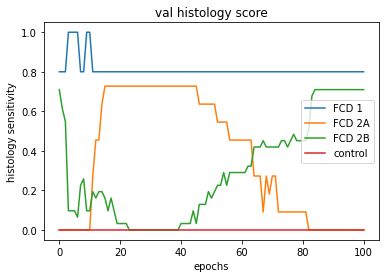

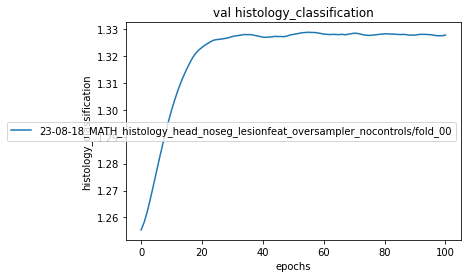

In [12]:
classes=['FCD 1', 'FCD 2A', 'FCD 2B', 'control']

fig, ax = plt.subplots(1,1)
for i in range(0,4):
    scores = exps[0].get_scores(split='train')[f'histo_{i}_sensitivity']
    ax.plot(scores.index, scores, 
            # marker='o', 
            label=classes[i])
ax.set_xlabel('epochs')
ax.set_ylabel('histology sensitivity')
ax.set_title(f'train histology score')
plt.legend()

fig, ax = plt.subplots(1,1)
for i in range(0,4):
    scores = exps[0].get_scores(split='val')[f'histo_{i}_sensitivity']
    ax.plot(scores.index, scores,
            # marker='o', 
            label=classes[i])
ax.set_xlabel('epochs')
ax.set_ylabel('histology sensitivity')
ax.set_title(f'val histology score')
plt.legend()


histo_loss = plot_scores(exps, 'histology_classification',split='val')

In [32]:
scores = exps[0].get_scores(split='val')[f'histo_1_precision']
scores.mean()

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-05-23_MATH_test_histology_head/fold_00


0.03227768215720023

In [62]:
for dice, dist in zip(dice_l,dist_l):
    print(dist[np.argmax(dice)],dice[np.argmax(dice)])

0.1044645959855583 0.3048057692206424
0.1003128320950528 0.2422897891829843
0.0885805821719417 0.2708315512408381
0.0999528994864743 0.2853840333207146
0.0844565791523327 0.2667630861472824


In [57]:
dl[0][100],dl[1][100]
0.1518119042739272/0.0012024920509682

126.24774039187548

In [30]:
#extract max aurocs across exps
exp_name='classification'
split='val'
score='auroc'
stored_scores = np.zeros((len(big_exp[exp_name]),5))
for fold in np.arange(5):
    experiment_paths = big_exp[exp_name].copy()
    for pi,path in enumerate(experiment_paths):
        experiment_paths[pi] = os.path.join(path,f'fold_0{fold}')
    exps = [Experiment.from_folder(os.path.join(EXPERIMENT_PATH,p)) for p in experiment_paths]
    for ei,exp in enumerate(exps):
        scores = exp.get_scores(split=split)[score]
        stored_scores[ei,fold]=np.max(scores)


Initialised Experiment 23-02-09_MYCZ_baseline/s_2
Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2
Initialised Experiment 23-02-09_MYCZ_baseline/s_2
Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2
Initialised Experiment 23-02-09_MYCZ_baseline/s_2


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_01
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_01
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_01


Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2
Initialised Experiment 23-02-09_MYCZ_baseline/s_2
Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_02
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_02
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_02
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_03
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_03


Initialised Experiment 23-02-09_MYCZ_baseline/s_2
Initialised Experiment 23-02-09_MHYH_classification_deep/s_2
Initialised Experiment 23-02-09_MHYH_classification_non_deep/s_2


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_03
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MYCZ_baseline/s_2/fold_04
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_deep/s_2/fold_04
/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-09_MHYH_classification_non_deep/s_2/fold_04


In [31]:
np.mean(stored_scores,axis=1)

array([0.76011286, 0.74966305, 0.75022959])

In [45]:
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
val_ids=[
        "MELD_H3_3T_C_0024",
        "MELD_H17_3T_FCD_0075",
        "MELD_H3_3T_C_0060",
        "MELD_H15_3T_FCD_0006",
        "MELD_H4_3T_C_0017",
        "MELD_H9_3T_FCD_0009",
        "MELD_H23_15T_FCD_0037",
        "MELD_H3_3T_C_0005",
        "MELD_H18_3T_FCD_0004",
        "MELD_H14_3T_FCD_0002",
        "MELD_H15_3T_C_0026",
        "MELD_H4_15T_FCD_0006",
        "MELD_H4_3T_FCD_0021",
        "MELD_H14_3T_FCD_0010",
        "MELD_H14_3T_C_0023",
        "MELD_H24_3T_FCD_0014",
        "MELD_H15_3T_C_0023",
        "MELD_H3_3T_C_0063",
        "MELD_H2_15T_C_0005",
        "MELD_H12_3T_C_0030",
        "MELD_H2_3T_FCD_0015",
        "MELD_H23_15T_FCD_0016",
        "MELD_H3_3T_FCD_0001",
        "MELD_H4_3T_C_0011",
        "MELD_H11_3T_FCD_0033",
        "MELD_H15_3T_C_0002",
        "MELD_H4_15T_C_0009",
        "MELD_H4_3T_FCD_0032",
        "MELD_H24_3T_FCD_0021",
        "MELD_H4_3T_C_0005",
        "MELD_H11_3T_FCD_0024",
        "MELD_H4_15T_C_0013",
        "MELD_H12_3T_C_0013",
        "MELD_H4_15T_FCD_0010",
        "MELD_H15_3T_FCD_0001",
        "MELD_H2_15T_C_0004",
        "MELD_H10_3T_FCD_0011",
        "MELD_H17_3T_FCD_0082",
        "MELD_H3_3T_C_0092",
        "MELD_H17_3T_FCD_0033",
        "MELD_H17_15T_FCD_0106",
        "MELD_H21_3T_FCD_0023",
        "MELD_H18_3T_FCD_0003",
        "MELD_H11_3T_FCD_0005",
        "MELD_H11_3T_FCD_0013",
        "MELD_H15_3T_C_0037",
        "MELD_H17_3T_FCD_0092",
        "MELD_H5_3T_C_0005",
        "MELD_H2_15T_C_0002",
        "MELD_H4_15T_FCD_0005",
        "MELD_H4_3T_FCD_0008",
        "MELD_H16_3T_FCD_042",
        "MELD_H26_15T_FCD_0006",
        "MELD_H4_3T_FCD_0041",
        "MELD_H17_3T_FCD_0069",
        "MELD_H14_3T_FCD_0028",
        "MELD_H3_3T_C_0029",
        "MELD_H3_3T_C_0025",
        "MELD_H17_3T_FCD_0129",
        "MELD_H21_3T_FCD_0022",
        "MELD_H15_3T_C_0017",
        "MELD_H4_15T_FCD_0022",
        "MELD_H24_3T_FCD_0009",
        "MELD_H12_3T_FCD_0029",
        "MELD_H3_3T_C_0022",
        "MELD_H10_3T_FCD_0006",
        "MELD_H17_3T_FCD_0037",
        "MELD_H3_3T_C_0027",
        "MELD_H5_3T_FCD_0016",
        "MELD_H17_3T_FCD_0063",
        "MELD_H5_3T_FCD_0023",
        "MELD_H11_3T_FCD_0026",
        "MELD_H17_3T_FCD_0118",
        "MELD_H2_3T_FCD_0002",
        "MELD_H4_15T_C_0028",
        "MELD_H14_3T_FCD_0006",
        "MELD_H12_3T_FCD_0019",
        "MELD_H14_3T_FCD_0005",
        "MELD_H2_15T_FCD_0002",
        "MELD_H21_3T_FCD_0020",
        "MELD_H24_3T_FCD_0027",
        "MELD_H19_3T_C_010",
        "MELD_H10_3T_C_0004",
        "MELD_H3_3T_C_0064",
        "MELD_H17_3T_FCD_0123",
        "MELD_H21_3T_FCD_0045",
        "MELD_H3_3T_C_0002",
        "MELD_H17_3T_FCD_0109",
        "MELD_H15_3T_C_0021",
        "MELD_H11_3T_FCD_0038",
        "MELD_H17_3T_FCD_0059"
    ]

c = MeldCohort(hdf5_file_root="{site_code}_{group}_featurematrix.hdf5", dataset=None)

groups=[]
histo=[]
for subject in val_ids:
    subj = MeldSubject(subject, cohort=c)
    groups.append(subj.group)
    histo.append(subj.get_demographic_features(["Histology"])[0])
groups=np.array(groups)
histo=np.array(histo)

In [53]:
print('number subject val')
print(len(val_ids))
print('number patients val')
print((groups=='patient').sum())
print(f'FCD_1:')
print((histo[(groups=='patient')]=='FCD_1').sum())
print(f'FCD_2A:')
print((histo[(groups=='patient')]=='FCD_2A').sum())
print(f'FCD_2B:')
print((histo[(groups=='patient')]=='FCD_2B').sum())
print(f'FCD_3:')
print((histo[(groups=='patient')]=='FCD_3').sum())


number subject val
91
number patients val
59
FCD_1:
6
FCD_2A:
11
FCD_2B:
23
FCD_3:
3


In [44]:
np.array(groups)=='patient'

array([False,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True, False,  True,
        True])